<a href="https://colab.research.google.com/github/keatrean/projects/blob/master/swearwords_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade torch transformers

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 906.4/906.4 MB 1.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 31.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 22.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 17.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('train.csv')
print(data.head())
print(data['label'].value_counts())

   ID                                               text  label
0   0  –ë—Ä—é–∫–∏ –æ—Ç–ª–∏—á–Ω—ã–µ, –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ, –Ω–æ –∫ —Å–æ–∂–∞–ª–µ–Ω–∏—é –∫...      0
1   1  –û—Ç–ª–∏—á–Ω—ã–π –∞–ø–ø–∞—Ä–∞—Ç, –≤ –∫–æ–º–ø–ª–µ–∫—Ç–µ –∫–∞–±–µ–ª—å –∏ —Ä–∞–±–æ—Ç–µ—Ç...      0
2   2                            –°—É–ø–µ—Ä üëç —Å–ø–∞—Å–∏–±–æ –±–æ–ª—å—à–æ–µ      0
3   3  –ü–æ–ª—É—á–∏–ª –±—ã—Å—Ç—Ä–æ –¥–∞–Ω–Ω—ã–µ –Ω–∞—É—à–Ω–∏–∫–∏! –ö –Ω–∞—É—à–Ω–∏–∫–∞–º –ø—Ä...      0
4   4                 –í—Å—ë –¥–æ—à–ª–æ –≤ —Ü–µ–ª–æ—Å—Ç–∏ –∏ —Å–æ—Ö—Ä–∞–Ω–Ω–æ—Å—Ç–∏)      0
label
0    210461
1     29698
Name: count, dtype: int64


<ipython-input-5-eda0952ec468>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


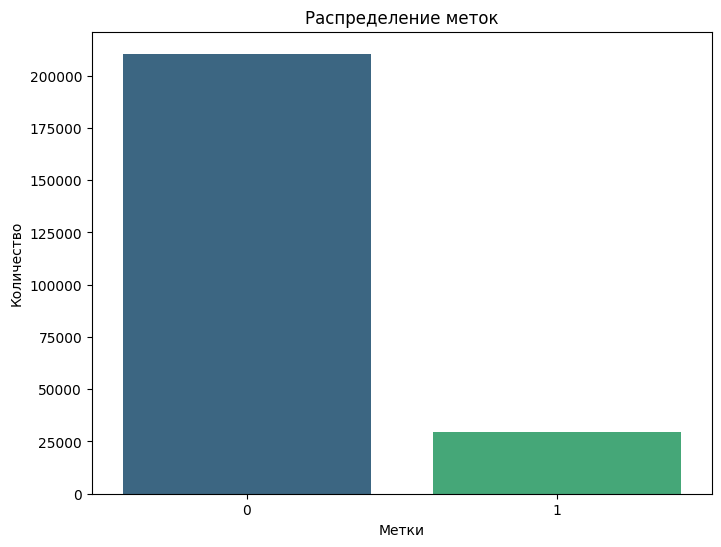

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

label_counts = data['label'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")

plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –º–µ—Ç–æ–∫')
plt.xlabel('–ú–µ—Ç–∫–∏')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')

plt.show()

# –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞

In [ ]:
!pip install transliterate

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 45.8/45.8 kB 3.7 MB/s eta 0:00:00


In [ ]:
import spacy
from spacy import load
from spacy.lang.ru.examples import sentences
from spacy.lang.ru import Russian
from transliterate import translit
import re
from nltk.corpus import stopwords
import nltk

In [ ]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords_ru = stopwords.words("russian")

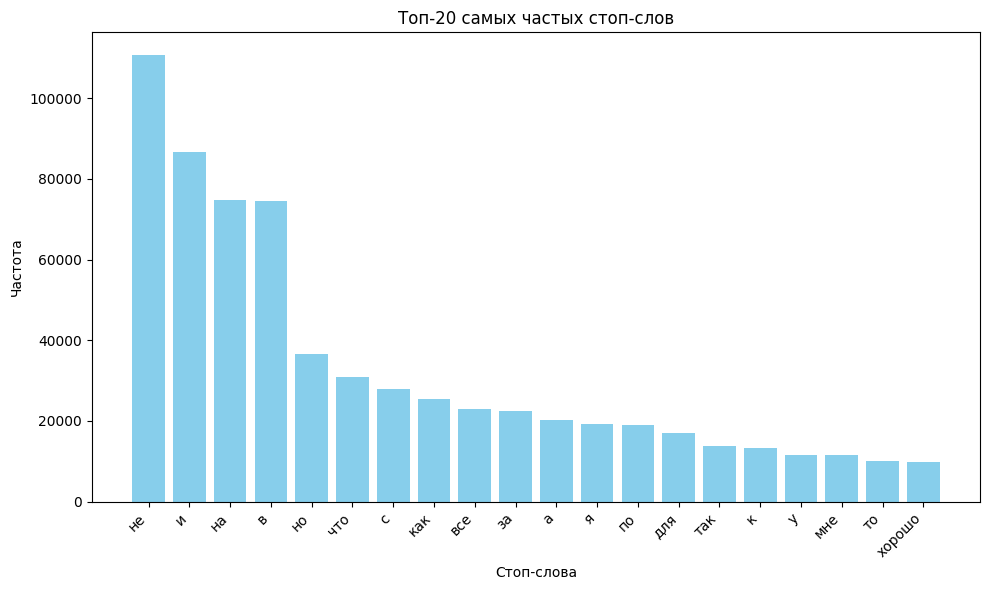

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
text_data = data['text']

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø–æ–¥—Å—á–µ—Ç–∞ —Å—Ç–æ–ø-—Å–ª–æ–≤
def count_stopwords(texts, stopwords):
    stopword_counts = Counter()
    for text in texts:
        words = text.lower().split()  # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤ —Å–ø–∏—Å–æ–∫ —Å–ª–æ–≤
        stopword_counts.update(word for word in words if word in stopwords)
    return stopword_counts

# –ü–æ–¥—Å—á–µ—Ç —Å—Ç–æ–ø-—Å–ª–æ–≤
stopword_counts = count_stopwords(text_data, stopwords_ru)

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤ —Å–ª–æ–≤–∞—Ä—å –¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞
stopword_freq = dict(stopword_counts)

# –í—ã–±–∏—Ä–∞–µ–º —Ç–æ–ø-20 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö —Å—Ç–æ–ø-—Å–ª–æ–≤
most_common = stopword_counts.most_common(20)

# –†–∞–∑–¥–µ–ª—è–µ–º –Ω–∞ —Å–ª–æ–≤–∞ –∏ —á–∞—Å—Ç–æ—Ç—ã
words, frequencies = zip(*most_common)

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ —Å—Ç–æ–ª–±—á–∞—Ç–æ–π –¥–∏–∞–≥—Ä–∞–º–º—ã
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.xticks(rotation=45, ha='right')  # –ü–æ–≤–æ—Ä–æ—Ç –ø–æ–¥–ø–∏—Å–µ–π –¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞
plt.title('–¢–æ–ø-20 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö —Å—Ç–æ–ø-—Å–ª–æ–≤')
plt.xlabel('–°—Ç–æ–ø-—Å–ª–æ–≤–∞')
plt.ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
plt.tight_layout()
plt.show()

In [ ]:
def preprocess(text):
  text = text.lower()
  text = translit(text, 'ru')
  text = delete_long_seq(text)
  tokens = get_letters_and_numbers(text)
  tokens = delete_stopwords(tokens)
  text = " ".join(tokens)

  return text

def delete_long_seq(text):
    # —É–¥–∞–ª–µ–Ω–∏–µ –ø–æ–≤—Ç–æ—Ä—è—é—â–∏—Ö—Å—è >3 —Ä–∞–∑ —Å–∏–º–≤–æ–ª–æ–≤
    pattern = re.compile(r"(.)\1{2,}")
    new_text = pattern.sub(r"\1", text)
    return new_text

def get_letters_and_numbers(text):
    # tokens = re.findall(r'[–∞-—è—ë]+(?:[.-][–∞-—è—ë]*)?', text)
    tokens = [re.sub(r'[^–∞-—è—ë0-9]', '', word) for word in text.split()]
    return tokens

def delete_stopwords(tokens):
    tokens = [
        token for token in tokens
        if token not in stopwords_ru
    ]
    return tokens

In [ ]:
my_text = '–ø–æ–ª–Ω–µ–π—à–µ–µ —Ö. —Ç–æ–Ω–∫–∞—è 2022–≥., —Ö–ª–∏–ø–∫–∞—è –∏ —Ç–¥. –≤—ã–∫–∏–Ω—É–ª!'
preprocess(my_text)

'–ø–æ–ª–Ω–µ–π—à–µ–µ —Ö —Ç–æ–Ω–∫–∞—è 2022–≥ —Ö–ª–∏–ø–∫–∞—è —Ç–¥ –≤—ã–∫–∏–Ω—É–ª'

In [ ]:
data['clean_text'] = data['text'].apply(preprocess)
data.head()

ID                                               text  label  \
0   0  –ë—Ä—é–∫–∏ –æ—Ç–ª–∏—á–Ω—ã–µ, –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ, –Ω–æ –∫ —Å–æ–∂–∞–ª–µ–Ω–∏—é –∫...      0   
1   1  –û—Ç–ª–∏—á–Ω—ã–π –∞–ø–ø–∞—Ä–∞—Ç, –≤ –∫–æ–º–ø–ª–µ–∫—Ç–µ –∫–∞–±–µ–ª—å –∏ —Ä–∞–±–æ—Ç–µ—Ç...      0   
2   2                            –°—É–ø–µ—Ä üëç —Å–ø–∞—Å–∏–±–æ –±–æ–ª—å—à–æ–µ      0   
3   3  –ü–æ–ª—É—á–∏–ª –±—ã—Å—Ç—Ä–æ –¥–∞–Ω–Ω—ã–µ –Ω–∞—É—à–Ω–∏–∫–∏! –ö –Ω–∞—É—à–Ω–∏–∫–∞–º –ø—Ä...      0   
4   4                 –í—Å—ë –¥–æ—à–ª–æ –≤ —Ü–µ–ª–æ—Å—Ç–∏ –∏ —Å–æ—Ö—Ä–∞–Ω–Ω–æ—Å—Ç–∏)      0   

                                          clean_text  
0  –±—Ä—é–∫–∏ –æ—Ç–ª–∏—á–Ω—ã–µ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ —Å–æ–∂–∞–ª–µ–Ω–∏—é –∫–æ—Ä–æ—Ç–∫–æ ...  
1  –æ—Ç–ª–∏—á–Ω—ã–π –∞–ø–ø–∞—Ä–∞—Ç –∫–æ–º–ø–ª–µ–∫—Ç–µ –∫–∞–±–µ–ª—å —Ä–∞–±–æ—Ç–µ—Ç—Ç —Å–µ—Ç...  
2                             —Å—É–ø–µ—Ä  —Å–ø–∞—Å–∏–±–æ –±–æ–ª—å—à–æ–µ  
3  –ø–æ–ª—É—á–∏–ª –±—ã—Å—Ç—Ä–æ –¥–∞–Ω–Ω—ã–µ –Ω–∞—É—à–Ω–∏–∫–∏ –Ω–∞—É—à–Ω–∏–∫–∞–º –ø—Ä–∏—à—ë...  
4                      –≤—Å—ë –¥–æ—à–ª–æ —Ü–µ–ª–æ—Å—Ç–∏ —Å–æ—Ö—Ä–∞–Ω–Ω–æ—Å—Ç–∏

# –û—Ç–¥–µ–ª—å–Ω–æ –ø—Ä–æ–≤–æ–¥–∏—Ç—Å—è –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–∞

In [ ]:
!python -m spacy download ru_core_news_sm

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 15.3/15.3 MB 67.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 53.8/53.8 kB 3.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8.4/8.4 MB 86.8 MB/s eta 0:00:00
‚úî Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
‚ö† Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import ru_core_news_sm
nlp_ru = ru_core_news_sm.load()

In [ ]:
lemma = []

for doc in nlp_ru.pipe(data['clean_text']):
    lemma.append([n.lemma_ for n in doc])
print(lemma[:5])

[['–±—Ä—é–∫–∏', '–æ—Ç–ª–∏—á–Ω—ã–π', '–∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–π', '—Å–æ–∂–∞–ª–µ–Ω–∏–µ', '–∫–æ—Ä–æ—Ç–∫–æ', '–≤–∞—Ç—ã', '–ø–æ—ç—Ç–æ–º—É', '–æ—Ç–∫–∞–∑', '–æ–±–∏–¥–Ω–æ', '–ø—Ä–æ–¥–∞–≤–µ—Ü', '—Ä–µ–∫–æ–º–µ–Ω–¥–æ–≤–∞—Ç—å', '–≤–µ—Å—å'], ['–æ—Ç–ª–∏—á–Ω—ã–π', '–∞–ø–ø–∞—Ä–∞—Ç', '–∫–æ–º–ø–ª–µ–∫—Ç–µ', '–∫–∞–±–µ–ª—å', '—Ä–∞–±–æ—Ç–µ—Ç—Ç', '—Å–µ—Ç—å', ' ', '–∑–Ω–∞—á–∏—Ç—å', '—Å—Ä–∞–∑—É', '–ø—Ä–∏—Å—Ç—É–ø–∞—Ç—å', '–∏–∑–º–µ—Ä–µ–Ω–∏–µ', '–¥–∞–≤–ª–µ–Ω–∏–µ'], ['—Å—É–ø–µ—Ä', ' ', '—Å–ø–∞—Å–∏–±–æ', '–±–æ–ª—å—à–æ–π'], ['–ø–æ–ª—É—á–∏—Ç—å', '–±—ã—Å—Ç—Ä–æ', '–¥–∞–Ω–Ω—ã–µ', '–Ω–∞—É—à–Ω–∏–∫', '–Ω–∞—É—à–Ω–∏–∫', '–ø—Ä–∏–π—Ç–∏', '–ø—Ä–∏–∫–æ–ª—å–Ω—ã–π', '—á–µ—Ö–æ–ª', '–ø—Ä–æ–±–ª–µ–º–∞', '–ø–æ–¥–∫–ª—é—á–µ–Ω–∏–µ'], ['–≤—Å—ë', '–¥–æ–π—Ç–∏', '—Ü–µ–ª–æ—Å—Ç—å', '—Å–æ—Ö—Ä–∞–Ω–Ω–æ—Å—Ç—å']]


In [ ]:
lemma_as_strings = [' '.join(l) for l in lemma]
lemma_df = pd.DataFrame(lemma_as_strings, columns=['lemmas'])
lemma_df.to_csv('train_lemmas_with_numbers.csv', index=False)

In [ ]:
lemma_df.head()

lemmas
0                                    —Ö–æ—Ä–æ—à–∏–π –ø–æ–¥–æ—à–∫–ª
1  —Ç–æ–Ω—é—Å–µ–Ω—å–∫–∏–π —Å–∞–∂–µ–Ω–µ—Ü –¥–æ—Å–º–æ—Ç—Ä–µ—Ç—å –æ–ø–∏—Å–∞–Ω–∏–µ –≥–æ–¥–æ–≤–∞–ª—ã–π
2  –∫–æ–≥—Ç–µ—Ç–æ—á–∫–∞ —Ö–æ—Ä–æ—à–∏–π —Ç–∫–∞–Ω—å –æ—Å–Ω–æ–≤–∞–Ω–∏–∏ –ø–ª–æ—Ö–æ –ø—Ä–∏–∫–ª...
3                         –∑–∞—Ç—è–∂–∫–∞ –ø–æ—Ä–∞–¥–æ–≤–∞—Ç—å –ø–æ–∫—É–ø–∫–∞
4                                      —Ä–µ–∫–æ–º–µ–Ω–¥–æ–≤–∞—Ç—å

In [ ]:
lemma_df = pd.read_csv('train_lemmas_with_numbers.csv', skip_blank_lines=False)
data['clean_text'] = lemma_df['lemmas']
data.head()

ID                                               text  label  \
0   0  –ë—Ä—é–∫–∏ –æ—Ç–ª–∏—á–Ω—ã–µ, –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ, –Ω–æ –∫ —Å–æ–∂–∞–ª–µ–Ω–∏—é –∫...      0   
1   1  –û—Ç–ª–∏—á–Ω—ã–π –∞–ø–ø–∞—Ä–∞—Ç, –≤ –∫–æ–º–ø–ª–µ–∫—Ç–µ –∫–∞–±–µ–ª—å –∏ —Ä–∞–±–æ—Ç–µ—Ç...      0   
2   2                            –°—É–ø–µ—Ä üëç —Å–ø–∞—Å–∏–±–æ –±–æ–ª—å—à–æ–µ      0   
3   3  –ü–æ–ª—É—á–∏–ª –±—ã—Å—Ç—Ä–æ –¥–∞–Ω–Ω—ã–µ –Ω–∞—É—à–Ω–∏–∫–∏! –ö –Ω–∞—É—à–Ω–∏–∫–∞–º –ø—Ä...      0   
4   4                 –í—Å—ë –¥–æ—à–ª–æ –≤ —Ü–µ–ª–æ—Å—Ç–∏ –∏ —Å–æ—Ö—Ä–∞–Ω–Ω–æ—Å—Ç–∏)      0   

                                          clean_text  
0  –±—Ä—é–∫–∏ –æ—Ç–ª–∏—á–Ω—ã–π –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–π —Å–æ–∂–∞–ª–µ–Ω–∏–µ –∫–æ—Ä–æ—Ç–∫–æ ...  
1  –æ—Ç–ª–∏—á–Ω—ã–π –∞–ø–ø–∞—Ä–∞—Ç –∫–æ–º–ø–ª–µ–∫—Ç–µ –∫–∞–±–µ–ª—å —Ä–∞–±–æ—Ç–µ—Ç—Ç —Å–µ—Ç...  
2                            —Å—É–ø–µ—Ä   —Å–ø–∞—Å–∏–±–æ –±–æ–ª—å—à–æ–π  
3  –ø–æ–ª—É—á–∏—Ç—å –±—ã—Å—Ç—Ä–æ –¥–∞–Ω–Ω—ã–µ –Ω–∞—É—à–Ω–∏–∫ –Ω–∞—É—à–Ω–∏–∫ –ø—Ä–∏–π—Ç–∏ ...  
4                      –≤—Å—ë –¥–æ–π—Ç–∏ —Ü–µ–ª–æ—Å—Ç—å —Å–æ—Ö—Ä–∞–Ω–Ω–æ—Å—Ç—å

# –û—á–∏—â–∞–µ–º –æ—Ç –ø—É—Å—Ç—ã—Ö —Å—Ç—Ä–æ–∫

In [ ]:
len(data)

240159

In [ ]:
data = data.dropna().reset_index(drop=True)

In [ ]:
len(data)

236828

–°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö —Ñ–∞–π–ª

In [ ]:
data.to_csv('cleaned_train_data.csv', index=False)

In [ ]:
data = pd.read_csv('cleaned_train_data.csv')

In [ ]:
data.head()

ID                                               text  label  \
0   0  –ë—Ä—é–∫–∏ –æ—Ç–ª–∏—á–Ω—ã–µ, –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ, –Ω–æ –∫ —Å–æ–∂–∞–ª–µ–Ω–∏—é –∫...      0   
1   1  –û—Ç–ª–∏—á–Ω—ã–π –∞–ø–ø–∞—Ä–∞—Ç, –≤ –∫–æ–º–ø–ª–µ–∫—Ç–µ –∫–∞–±–µ–ª—å –∏ —Ä–∞–±–æ—Ç–µ—Ç...      0   
2   2                            –°—É–ø–µ—Ä üëç —Å–ø–∞—Å–∏–±–æ –±–æ–ª—å—à–æ–µ      0   
3   3  –ü–æ–ª—É—á–∏–ª –±—ã—Å—Ç—Ä–æ –¥–∞–Ω–Ω—ã–µ –Ω–∞—É—à–Ω–∏–∫–∏! –ö –Ω–∞—É—à–Ω–∏–∫–∞–º –ø—Ä...      0   
4   4                 –í—Å—ë –¥–æ—à–ª–æ –≤ —Ü–µ–ª–æ—Å—Ç–∏ –∏ —Å–æ—Ö—Ä–∞–Ω–Ω–æ—Å—Ç–∏)      0   

                                          clean_text  
0  –±—Ä—é–∫–∏ –æ—Ç–ª–∏—á–Ω—ã–π –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–π —Å–æ–∂–∞–ª–µ–Ω–∏–µ –∫–æ—Ä–æ—Ç–∫–æ ...  
1  –æ—Ç–ª–∏—á–Ω—ã–π –∞–ø–ø–∞—Ä–∞—Ç –∫–æ–º–ø–ª–µ–∫—Ç–µ –∫–∞–±–µ–ª—å —Ä–∞–±–æ—Ç–µ—Ç—Ç —Å–µ—Ç...  
2                            —Å—É–ø–µ—Ä   —Å–ø–∞—Å–∏–±–æ –±–æ–ª—å—à–æ–π  
3  –ø–æ–ª—É—á–∏—Ç—å –±—ã—Å—Ç—Ä–æ –¥–∞–Ω–Ω—ã–µ –Ω–∞—É—à–Ω–∏–∫ –Ω–∞—É—à–Ω–∏–∫ –ø—Ä–∏–π—Ç–∏ ...  
4                      –≤—Å—ë –¥–æ–π—Ç–∏ —Ü–µ–ª–æ—Å—Ç—å —Å–æ—Ö—Ä–∞–Ω–Ω–æ—Å—Ç—å

# Fine-tuning –º–æ–¥–µ–ª–∏ rubert-base-cased –¥–ª—è –∑–∞–¥–∞—á–∏ –±–∏–Ω–∞—Ä–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏

In [ ]:
import torch
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(
    "DeepPavlov/rubert-base-cased",
    num_labels=2
)


pytorch_model.bin:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model_path = "swearwords-text-classification-model"


# Model Checkpoints

The trained model is hosted on [Hugging Face Hub].


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import TrainingArguments
import torch

tokenizer = AutoTokenizer.from_pretrained('')

# –ó–∞–≥—Ä—É–∑–∫–∞ –º–æ–¥–µ–ª–∏
model = AutoModelForSequenceClassification.from_pretrained('')


tokenizer_config.json:   0%|          | 0.00/1.27k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.57M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/918 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/711M [00:00<?, ?B/s]

In [ ]:
!pip install evaluate

In [ ]:
import numpy as np
import evaluate

metric = evaluate.load("f1")

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
train_texts, test_texts, train_labels, test_labels = train_test_split(
   data["clean_text"].tolist(), data["label"].tolist(), test_size=0.2, random_state=42
)

In [ ]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=64)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=64)

In [ ]:
# –ü—Ä–∏–º–µ—Ä —Ç–µ–∫—Å—Ç–∞ –¥–ª—è —Ç–æ–∫–µ–Ω–∏–∑–∞—Ü–∏–∏
text = "—Ö –Ω—è –ø–æ–ª–Ω—ã–π 2022–≥ –±–æ–ª—å—à–µ –Ω–µ –∫—É–ø–ª—é"

# –¢–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–∞
tokenized_output = tokenizer(text, truncation=True, padding=True, max_length=10)  # max_length –æ–≥—Ä–∞–Ω–∏—á–∏–≤–∞–µ—Ç –≤—ã–≤–æ–¥ –¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞

# –í—ã–≤–æ–¥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞
print("–¢–æ–∫–µ–Ω—ã:", tokenizer.convert_ids_to_tokens(tokenized_output['input_ids']))
print("IDs —Ç–æ–∫–µ–Ω–æ–≤:", tokenized_output['input_ids'])
print("Attention mask:", tokenized_output['attention_mask'])

–¢–æ–∫–µ–Ω—ã: ['[CLS]', '—Ö', '–Ω—è', '–ø–æ–ª–Ω—ã–π', '2022', '##–≥', '–±–æ–ª—å—à–µ', '–Ω–µ', '–∫—É–ø', '[SEP]']
IDs —Ç–æ–∫–µ–Ω–æ–≤: [101, 883, 118314, 21228, 73190, 848, 8980, 1699, 10320, 102]
Attention mask: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
from torch.utils.data import Dataset

class CommentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = CommentDataset(train_encodings, train_labels)
test_dataset = CommentDataset(test_encodings, test_labels)


–≠—Ç–æ –±—ã–ª —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç —Å –≤–∑–≤–µ—à–∏–≤–∞–Ω–∏–µ–º –∫–ª–∞—Å—Å–æ–≤, –ø–æ–∫–∞–∑–∞–ª —Ö—É–¥—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã

In [ ]:
# from sklearn.utils.class_weight import compute_class_weight
# import numpy as np
# train_labels = data['label']
# # –†–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ–º –≤–µ—Å–∞ –∫–ª–∞—Å—Å–æ–≤
# class_weights = compute_class_weight(
#     class_weight='balanced',
#     classes=np.unique(train_labels),
#     y=train_labels
# )
# print("Class Weights:", class_weights)
# class_weights_tensor = torch.tensor(class_weights, dtype=torch.float)

Class Weights: [0.57168376 3.98754041]


In [ ]:
# from torch import nn
# class CustomTrainer(Trainer):
#     def compute_loss(self, model, inputs, return_outputs=False,  **kwargs):
#         labels = inputs.pop("labels")
#         # forward pass
#         outputs = model(**inputs)
#         logits = outputs.get("logits")
#         # compute custom loss for 2 labels with different weights
#         loss_fct = nn.CrossEntropyLoss(weight=class_weights_tensor.to(model.device))
#         loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
#         return (loss, outputs) if return_outputs else loss

In [ ]:
from transformers import TrainingArguments
training_args = TrainingArguments(
    output_dir='./results',
    learning_rate=2e-5,
    eval_strategy ="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    fp16=True,
    gradient_accumulation_steps=4
)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


TrainOutput(global_step=5920, training_loss=0.05193434116002676, metrics={'train_runtime': 2645.153, 'train_samples_per_second': 143.252, 'train_steps_per_second': 2.238, 'total_flos': 1.24606106930304e+16, 'train_loss': 0.05193434116002676, 'epoch': 1.9996622192197264})

In [ ]:
model_path = "swearwords-text-classification-model"
trainer.save_model(model_path)
tokenizer.save_pretrained(model_path)

('swearwords-text-classification-model/tokenizer_config.json',
 'swearwords-text-classification-model/special_tokens_map.json',
 'swearwords-text-classification-model/vocab.txt',
 'swearwords-text-classification-model/added_tokens.json',
 'swearwords-text-classification-model/tokenizer.json')

In [ ]:
# –ü–æ–ª—É—á–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ
predictions = trainer.predict(test_dataset)
test_preds = np.argmax(predictions.predictions, axis=-1)

# –í—ã—á–∏—Å–ª–µ–Ω–∏–µ F1-score
f1_test = f1_score(test_labels, test_preds)
print(f"F1-Score –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: {f1_test}")


F1-Score –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.9540269027754129


In [ ]:
errors_df = pd.DataFrame()
errors_df['true_label'] = test_labels
errors_df['pred_label'] = test_preds
errors_df['clean_text'] = test_texts

errors_df.head()

true_label  pred_label                                         clean_text
0           0           0                     –æ—Ç–ª–∏—á–Ω—ã–π —à–ª—ë–ø–∞–Ω–µ—Ü –ø—Ä–æ—Å—Ç–æ –∫–ª–∞—Å—Å
1           0           0                                   –æ—Ç–ª–∏—á–Ω—ã–π —Å–∞–∂–µ–Ω–µ—Ü
2           1           1  —ç—Ç–æ –ø–æ–¥–¥–µ–ª–∫–∞ –±—É—à–∏–¥–æ –∫–æ—Ä–æ—Ç–∫–∏–π –≥–æ–≤–Ω–æ –Ω–∏–∑–∫–∏–π –∫–∞—á–µ...
3           1           1  –ø—Ä–∏–π—Ç–∏ –∫–∞–∫–æ–π –≥–æ–≤–æ —Å—Ç—Ä–∞—à–Ω—ã–π –ø–µ—Ä—Å–æ–Ω–∞–∂ —Å—Ç—Ä–æ—à–Ω–µ–µ —Å...
4           0           0  —Ö–æ—Ä–æ—à–∏—è –≤–¥–æ–±–Ω–∞—è –∫–æ–≥—Ç–µ—Ç–æ—á–∫–ø   –∫–æ—Ç –∞–±–∞–∂–∞—é—Ç –∑–∞–∫–∞–∑...

In [ ]:
errors = errors_df[errors_df['true_label'] != errors_df['pred_label']]

print("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—à–∏–±–æ–∫:", len(errors))
errors_sorted = errors.sort_values(by='true_label', ascending=True)
errors_sorted.to_csv('errors_v5.csv', columns=[ 'true_label', 'pred_label', 'clean_text'], index=False)

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—à–∏–±–æ–∫: 540


#–û–±—Ä–∞–±–æ—Ç–∫–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –ø–æ–¥–∞—á–∏ submission –Ω–∞ Kaggle

In [ ]:
competition_data = pd.read_csv('test.csv')

In [ ]:
competition_data['clean_text'] = competition_data['text'].apply(preprocess)

In [ ]:
lemma = []

for doc in nlp_ru.pipe(competition_data['clean_text']):
    lemma.append([n.lemma_ for n in doc])

lemma_as_strings = [' '.join(l) for l in lemma]
lemma_df = pd.DataFrame(lemma_as_strings, columns=['lemmas'])
lemma_df.to_csv('comp_lemmas.csv', index=False)

In [ ]:
lemma_df = pd.read_csv('comp_lemmas.csv', skip_blank_lines=False)
competition_data['clean_text'] = lemma_df
competition_data.head()

ID                                               text  \
0   0                                   –•–æ—Ä–æ—à–∏–π, –ø–æ–¥–æ—à–∫–ª   
1   1  –°–æ–≤—Å–µ–º —Ç–æ–Ω—é—Å–µ–Ω—å–∫–∏–π —Å–∞–∂–µ–Ω–µ—Ü, –Ω–µ –¥–æ—Å–º–æ—Ç—Ä–µ–ª–∞ –≤ –æ–ø...   
2   2  –ö–æ–≥—Ç–µ—Ç–æ—á–∫–∞ —Ö–æ—Ä–æ—à–∞—è, –Ω–æ –≤–æ—Ç —Ç–∫–∞–Ω—å –Ω–∞ –æ—Å–Ω–æ–≤–∞–Ω–∏–∏ ...   
3   3               –ú–Ω–æ–≥–æ –∑–∞—Ç—è–∂–µ–∫, –Ω–µ –ø–æ—Ä–∞–¥–æ–≤–∞–ª–∞ –ø–æ–∫—É–ø–∫–∞   
4   4                                       –†–µ–∫–æ–º–µ–Ω–¥—É—é üí£   

                                          clean_text  
0                                    —Ö–æ—Ä–æ—à–∏–π –ø–æ–¥–æ—à–∫–ª  
1  —Ç–æ–Ω—é—Å–µ–Ω—å–∫–∏–π —Å–∞–∂–µ–Ω–µ—Ü –¥–æ—Å–º–æ—Ç—Ä–µ—Ç—å –æ–ø–∏—Å–∞–Ω–∏–µ –≥–æ–¥–æ–≤–∞–ª—ã–π  
2  –∫–æ–≥—Ç–µ—Ç–æ—á–∫–∞ —Ö–æ—Ä–æ—à–∏–π —Ç–∫–∞–Ω—å –æ—Å–Ω–æ–≤–∞–Ω–∏–∏ –ø–ª–æ—Ö–æ –ø—Ä–∏–∫–ª...  
3                         –∑–∞—Ç—è–∂–∫–∞ –ø–æ—Ä–∞–¥–æ–≤–∞—Ç—å –ø–æ–∫—É–ø–∫–∞  
4                                      —Ä–µ–∫–æ–º–µ–Ω–¥–æ–≤–∞—Ç—å

–°—Ç—Ä–æ–∫–∞–º, –∫–æ—Ç–æ—Ä—ã–µ –ø–æ—Å–ª–µ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏ –æ–∫–∞–∑–∞–ª–∏—Å—å –ø—É—Å—Ç—ã–º–∏, –ø—Ä–∏—Å–≤–∞–∏–≤–∞–µ—Ç—Å—è –∫–ª–∞—Å—Å 0, –¥–∞–ª—å—à–µ —Ä–∞–±–æ—Ç–∞—é —Ç–æ–ª—å–∫–æ —Å –Ω–µ–ø—É—Å—Ç—ã–º–∏ —Å—Ç—Ä–æ–∫–∞–º–∏

In [ ]:
competition_data['label'] = competition_data['clean_text'].apply(lambda x: 0 if pd.isna(x) or x.strip() == '' else None)
competition_data.head()

ID                                               text  \
0   0                                   –•–æ—Ä–æ—à–∏–π, –ø–æ–¥–æ—à–∫–ª   
1   1  –°–æ–≤—Å–µ–º —Ç–æ–Ω—é—Å–µ–Ω—å–∫–∏–π —Å–∞–∂–µ–Ω–µ—Ü, –Ω–µ –¥–æ—Å–º–æ—Ç—Ä–µ–ª–∞ –≤ –æ–ø...   
2   2  –ö–æ–≥—Ç–µ—Ç–æ—á–∫–∞ —Ö–æ—Ä–æ—à–∞—è, –Ω–æ –≤–æ—Ç —Ç–∫–∞–Ω—å –Ω–∞ –æ—Å–Ω–æ–≤–∞–Ω–∏–∏ ...   
3   3               –ú–Ω–æ–≥–æ –∑–∞—Ç—è–∂–µ–∫, –Ω–µ –ø–æ—Ä–∞–¥–æ–≤–∞–ª–∞ –ø–æ–∫—É–ø–∫–∞   
4   4                                       –†–µ–∫–æ–º–µ–Ω–¥—É—é üí£   

                                          clean_text  label  
0                                    —Ö–æ—Ä–æ—à–∏–π –ø–æ–¥–æ—à–∫–ª    NaN  
1  —Ç–æ–Ω—é—Å–µ–Ω—å–∫–∏–π —Å–∞–∂–µ–Ω–µ—Ü –¥–æ—Å–º–æ—Ç—Ä–µ—Ç—å –æ–ø–∏—Å–∞–Ω–∏–µ –≥–æ–¥–æ–≤–∞–ª—ã–π    NaN  
2  –∫–æ–≥—Ç–µ—Ç–æ—á–∫–∞ —Ö–æ—Ä–æ—à–∏–π —Ç–∫–∞–Ω—å –æ—Å–Ω–æ–≤–∞–Ω–∏–∏ –ø–ª–æ—Ö–æ –ø—Ä–∏–∫–ª...    NaN  
3                         –∑–∞—Ç—è–∂–∫–∞ –ø–æ—Ä–∞–¥–æ–≤–∞—Ç—å –ø–æ–∫—É–ø–∫–∞    NaN  
4                                      —Ä–µ–∫–æ–º–µ–Ω–¥–æ–≤–∞—Ç—å    NaN

In [ ]:
print(competition_data['clean_text'].isna().sum())

851


In [ ]:
empty_texts = competition_data[competition_data['label'] == 0]
empty_texts.head()

ID            text clean_text  label
175  175      ’á’°’ø ’¨’°’æ’∂ ’ß               0.0
250  250            üëéüèªüëéüèª        NaN    0.0
292  292             üëçüëçüëç        NaN    0.0
781  781              üëçüèΩ        NaN    0.0
797  797  üëçüëçüëçüëçüëçüëçüëçüëçüëçüëçüëçüëçüëçüëç        NaN    0.0

In [ ]:
non_empty_texts = competition_data[competition_data['label'].isna()][['ID','clean_text']] # –í—ã–±–∏—Ä–∞–µ–º —Ç–æ–ª—å–∫–æ —Å—Ç—Ä–æ–∫–∏ —Å —Ç–µ–∫—Å—Ç–æ–º

In [ ]:
non_empty_texts.head()

ID                                         clean_text
0   0                                    —Ö–æ—Ä–æ—à–∏–π –ø–æ–¥–æ—à–∫–ª
1   1  —Ç–æ–Ω—é—Å–µ–Ω—å–∫–∏–π —Å–∞–∂–µ–Ω–µ—Ü –¥–æ—Å–º–æ—Ç—Ä–µ—Ç—å –æ–ø–∏—Å–∞–Ω–∏–µ –≥–æ–¥–æ–≤–∞–ª—ã–π
2   2  –∫–æ–≥—Ç–µ—Ç–æ—á–∫–∞ —Ö–æ—Ä–æ—à–∏–π —Ç–∫–∞–Ω—å –æ—Å–Ω–æ–≤–∞–Ω–∏–∏ –ø–ª–æ—Ö–æ –ø—Ä–∏–∫–ª...
3   3                         –∑–∞—Ç—è–∂–∫–∞ –ø–æ—Ä–∞–¥–æ–≤–∞—Ç—å –ø–æ–∫—É–ø–∫–∞
4   4                                      —Ä–µ–∫–æ–º–µ–Ω–¥–æ–≤–∞—Ç—å

In [ ]:
comp_encodings = tokenizer(non_empty_texts['clean_text'].to_list(), truncation=True, padding=True, max_length=64,return_tensors='pt')

In [ ]:
class TestDataset(Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __getitem__(self, idx):
        item = {key: val[idx].clone().detach() for key, val in self.encodings.items()}
        return item

    def __len__(self):
        return len(self.encodings['input_ids'])

In [ ]:
comp_dataset = TestDataset(comp_encodings)

In [ ]:
predictions = trainer.predict(comp_dataset)
comp_preds = np.argmax(predictions.predictions, axis=-1)

In [ ]:
non_empty_indices = non_empty_texts.index
competition_data.loc[non_empty_indices, 'label'] = comp_preds

In [ ]:
final_data = competition_data[['ID', 'text', 'label']]

final_data.to_csv('submission_texts.csv', index=False)

print(final_data.head())

   ID                                               text  label
0   0                                   –•–æ—Ä–æ—à–∏–π, –ø–æ–¥–æ—à–∫–ª    0.0
1   1  –°–æ–≤—Å–µ–º —Ç–æ–Ω—é—Å–µ–Ω—å–∫–∏–π —Å–∞–∂–µ–Ω–µ—Ü, –Ω–µ –¥–æ—Å–º–æ—Ç—Ä–µ–ª–∞ –≤ –æ–ø...    0.0
2   2  –ö–æ–≥—Ç–µ—Ç–æ—á–∫–∞ —Ö–æ—Ä–æ—à–∞—è, –Ω–æ –≤–æ—Ç —Ç–∫–∞–Ω—å –Ω–∞ –æ—Å–Ω–æ–≤–∞–Ω–∏–∏ ...    0.0
3   3               –ú–Ω–æ–≥–æ –∑–∞—Ç—è–∂–µ–∫, –Ω–µ –ø–æ—Ä–∞–¥–æ–≤–∞–ª–∞ –ø–æ–∫—É–ø–∫–∞    0.0
4   4                                       –†–µ–∫–æ–º–µ–Ω–¥—É—é üí£    0.0


In [ ]:
competition_data['label'] = competition_data['label'].astype(int)
final_data = competition_data[['ID', 'label']]

final_data.to_csv('submission.csv', index=False)

print(final_data.head())

   ID  label
0   0      0
1   1      0
2   2      0
3   3      0
4   4      0
